# 3-SAT Problem, Algoritmo de Grover
## Ejercicio 1

     ┌───┐     ┌─────┐┌───┐┌──────┐┌───┐┌─────┐┌───┐┌──────┐┌───┐┌─┐      
q_0: ┤ H ├─────┤0    ├┤ H ├┤0     ├┤ H ├┤0    ├┤ H ├┤0     ├┤ H ├┤M├──────
     ├───┤     │     │├───┤│      │├───┤│     │├───┤│      │├───┤└╥┘┌─┐   
q_1: ┤ H ├─────┤1    ├┤ H ├┤1     ├┤ H ├┤1    ├┤ H ├┤1     ├┤ H ├─╫─┤M├───
     ├───┤     │  Uf │├───┤│  Uor │├───┤│  Uf │├───┤│  Uor │├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─────┤2    ├┤ H ├┤2     ├┤ H ├┤2    ├┤ H ├┤2     ├┤ H ├─╫──╫─┤M├
     ├───┤┌───┐│     │└───┘│      │└───┘│     │└───┘│      │└───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤3    ├─────┤3     ├─────┤3    ├─────┤3     ├──────╫──╫──╫─
     └───┘└───┘└─────┘     └──────┘     └─────┘     └──────┘      ║  ║  ║ 
c: 3/═════════════════════════════════════════════════════════════╩══╩══╩═
                                                                  2  1  0 


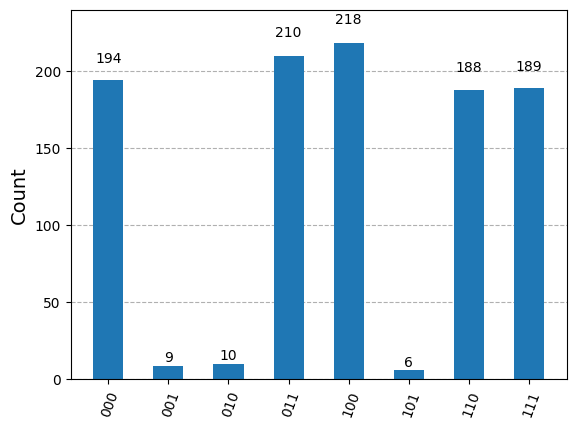

In [25]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import MCXGate  # Puerta multicontrol (c3x)
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.visualization import circuit_drawer

from qiskit import QuantumCircuit
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
gate uor a, b, c, d {
    x a;
    x b;
    c3x a, b, c, d;
    x b;
    x c;
    c3x a, b, c, d;
    x c;
    c3x a, b, c, d;
    x a;
    x b;
    x c;
    c3x a, b, c, d;
    x c;
    c3x a, b, c, d;
    x b;
    x c;
    c3x a, b, c, d;
    x c;
    c3x a, b, c, d;
}
gate uf a, b, c, d {
    x a;
    x b;
    x c;
    c3x a, b, c, d;
    x a;
    x b;
    x c;
    x a;
    c3x a, b, c, d;
    x a;
    x b;
    x c;
    c3x a, b, c, d;
    x b;
    x c;
    x c;
    c3x a, b, c, d;
    x c;
    c3x a, b, c, d;
}
qreg q[4];
creg c[3];

h q[0];
h q[1];
h q[2];
x q[3];
h q[3];
uf q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
uor q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
uf q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
uor q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
measure q[0] -> c[2];
measure q[1] -> c[1];
measure q[2] -> c[0];

// @columns [0,0,0,0,1,2,3,3,3,4,5,5,5,6,7,7,7,8,9,9,9,10,11,12]

"""
circuit = QuantumCircuit.from_qasm_str(qasm)

# Simular el circuito
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(circuit, simulator)  # Transpilar para el backend
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Obtener los resultados de las mediciones
counts = result.get_counts()

print(circuit_drawer(circuit, output='text'))

# Graficar el histograma
plot_histogram(counts)

## Ejercicio 2

     ┌───┐     ┌──────┐┌───┐┌──────┐┌───┐┌──────┐┌───┐┌──────┐┌───┐┌─┐      
q_0: ┤ H ├─────┤0     ├┤ H ├┤0     ├┤ H ├┤0     ├┤ H ├┤0     ├┤ H ├┤M├──────
     ├───┤     │      │├───┤│      │├───┤│      │├───┤│      │├───┤└╥┘┌─┐   
q_1: ┤ H ├─────┤1     ├┤ H ├┤1     ├┤ H ├┤1     ├┤ H ├┤1     ├┤ H ├─╫─┤M├───
     ├───┤     │  Uf2 │├───┤│  Uor │├───┤│  Uf2 │├───┤│  Uor │├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─────┤2     ├┤ H ├┤2     ├┤ H ├┤2     ├┤ H ├┤2     ├┤ H ├─╫──╫─┤M├
     ├───┤┌───┐│      │└───┘│      │└───┘│      │└───┘│      │└───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤3     ├─────┤3     ├─────┤3     ├─────┤3     ├──────╫──╫──╫─
     └───┘└───┘└──────┘     └──────┘     └──────┘     └──────┘      ║  ║  ║ 
c: 3/═══════════════════════════════════════════════════════════════╩══╩══╩═
                                                                    2  1  0 


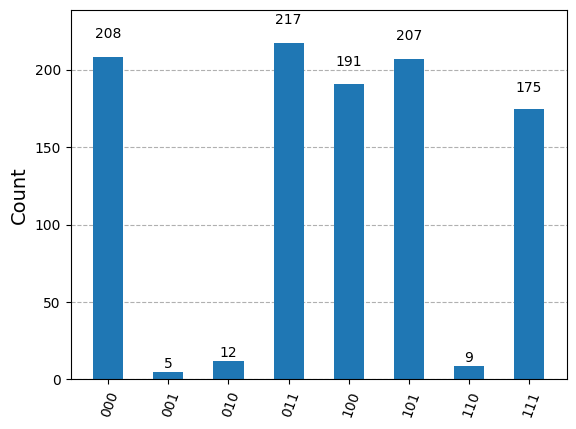

In [26]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import MCXGate  # Puerta multicontrol (c3x)
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.visualization import circuit_drawer

qasm = """
OPENQASM 2.0;
include "qelib1.inc";
gate uor a, b, c, d {
  x a;
  x b;
  c3x a, b, c, d;
  x b;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
  x b;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
}
gate uf a, b, c, d {
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  x a;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x b;
  x c;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
}
gate uf2 a, b, c, d {
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  x a;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x b;
  x c;
  x b;
  c3x a, b, c, d;
  x b;
  c3x a, b, c, d;
}
qreg q[4];
creg c[3];

h q[0];
h q[1];
h q[2];
x q[3];
h q[3];
uf2 q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
uor q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
uf2 q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
uor q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
measure q[0] -> c[2];
measure q[1] -> c[1];
measure q[2] -> c[0];

// @columns [0,0,0,0,1,2,3,3,3,4,5,5,5,6,7,7,7,8,9,9,9,10,11,12]

"""

circuit = QuantumCircuit.from_qasm_str(qasm)

# Simular el circuito
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(circuit, simulator)  # Transpilar para el backend
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Obtener los resultados de las mediciones
counts = result.get_counts()

print(circuit_drawer(circuit, output='text'))

# Graficar el histograma
plot_histogram(counts)

## Ejercicio 3

     ┌───┐     ┌──────┐┌───┐┌──────┐┌───┐┌──────┐┌───┐┌──────┐┌───┐┌─┐      
q_0: ┤ H ├─────┤0     ├┤ H ├┤0     ├┤ H ├┤0     ├┤ H ├┤0     ├┤ H ├┤M├──────
     ├───┤     │      │├───┤│      │├───┤│      │├───┤│      │├───┤└╥┘┌─┐   
q_1: ┤ H ├─────┤1     ├┤ H ├┤1     ├┤ H ├┤1     ├┤ H ├┤1     ├┤ H ├─╫─┤M├───
     ├───┤     │  Uf3 │├───┤│  Uor │├───┤│  Uf3 │├───┤│  Uor │├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─────┤2     ├┤ H ├┤2     ├┤ H ├┤2     ├┤ H ├┤2     ├┤ H ├─╫──╫─┤M├
     ├───┤┌───┐│      │└───┘│      │└───┘│      │└───┘│      │└───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤3     ├─────┤3     ├─────┤3     ├─────┤3     ├──────╫──╫──╫─
     └───┘└───┘└──────┘     └──────┘     └──────┘     └──────┘      ║  ║  ║ 
c: 3/═══════════════════════════════════════════════════════════════╩══╩══╩═
                                                                    2  1  0 


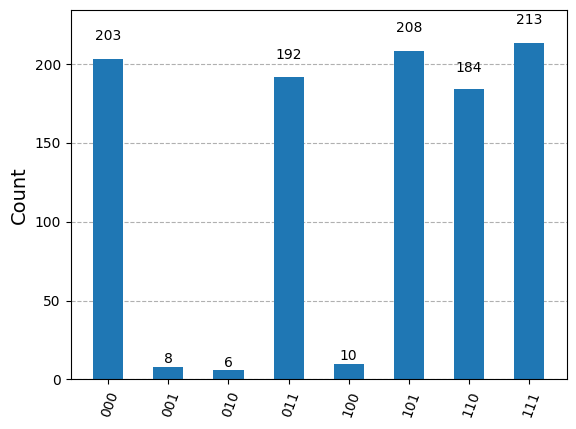

In [27]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import MCXGate  # Puerta multicontrol (c3x)
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.visualization import circuit_drawer

from qiskit import QuantumCircuit
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
gate uor a, b, c, d {
  x a;
  x b;
  c3x a, b, c, d;
  x b;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
  x b;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
}
gate uf a, b, c, d {
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  x a;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x b;
  x c;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
}
gate uf2 a, b, c, d {
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  x a;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x b;
  x c;
  x b;
  c3x a, b, c, d;
  x b;
  c3x a, b, c, d;
}
gate uf3 a, b, c, d {
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  x a;
  c3x a, b, c, d;
  x a;
  x b;
  c3x a, b, c, d;
  x b;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
}
qreg q[4];
creg c[3];

h q[0];
h q[1];
h q[2];
x q[3];
h q[3];
uf3 q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
uor q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
uf3 q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
uor q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
measure q[0] -> c[2];
measure q[1] -> c[1];
measure q[2] -> c[0];

// @columns [0,0,0,0,1,2,3,3,3,4,5,5,5,6,7,7,7,8,9,9,9,10,11,12]

"""
circuit = QuantumCircuit.from_qasm_str(qasm)

# Simular el circuito
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(circuit, simulator)  # Transpilar para el backend
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Obtener los resultados de las mediciones
counts = result.get_counts()

print(circuit_drawer(circuit, output='text'))

# Graficar el histograma
plot_histogram(counts)